In [282]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [283]:
def wrangle(filepath):
    # Read csv file into DataFrame
    df = pd.read_csv(filepath)
    # Split "lat-lon" column
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    df.drop(columns=["lat-lon"], inplace=True)
    # Create column "state" from "place_with_parent_names"
    df["state"] = df["place_with_parent_names"].str.split("|", expand=True)[2]
    df.drop(columns=["place_with_parent_names"], inplace=True)
    # Drop columns with over 50% null values
    df = df.drop(columns=["floor", "rooms", "expenses", "price_usd_per_m2", "price_per_m2", "surface_total_in_m2"], axis=1)
    # Drop low cardinality categorical variables
    df = df.drop(columns=["operation", "properati_url"], axis=1)
    # Drop Leaky Columns
    df = df.drop(columns=["price", "currency", "price_aprox_local_currency"], axis=1)
    # Drop NaN columns
    df.dropna(inplace=True)
    return df

In [284]:
files = glob("data/mexico-city-real-estate-*")
df_all = [wrangle(i) for i in files]

In [285]:
df = pd.concat(df_all)

In [286]:
df.head()

,property_type,price_aprox_usd,surface_covered_in_m2,lat,lon,state
0,apartment,289775.66,54.0,23.634501,-102.552788,Distrito Federal
1,house,79661.96,80.0,19.310330,-99.068557,Distrito Federal
2,apartment,48822.82,100.0,19.279771,-99.234597,Distrito Federal
3,apartment,337720.36,135.0,23.634501,-102.552788,Distrito Federal
4,apartment,875000.00,263.0,21.190264,-86.819838,Quintana Roo


In [287]:
df["property_type"].unique()

array(['apartment', 'house', 'store'], dtype=object)

In [288]:
df["state"].value_counts()

Distrito Federal    16036
Quintana Roo         3185
Solidaridad           228
Zacatecas              91
Benito Juárez          66
Othón P. Blanco         5
Mexicali                2
Name: state, dtype: int64

In [289]:
df = df[(df["state"]=="Distrito Federal") | (df["state"]=="Quintana Roo")]
df.shape

(19221, 6)

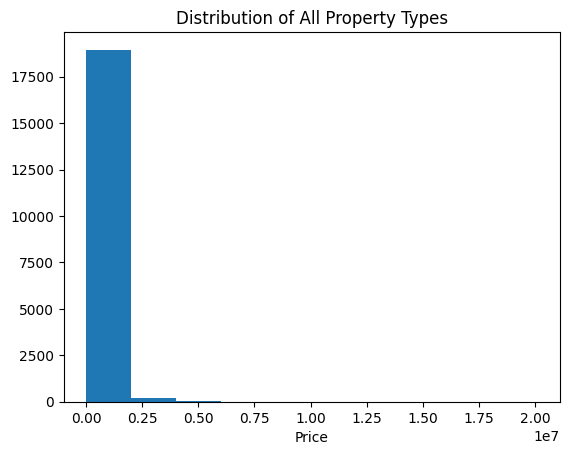

In [290]:
plt.hist(df["price_aprox_usd"])
plt.xlabel("Price")
plt.title("Distribution of All Property Types");

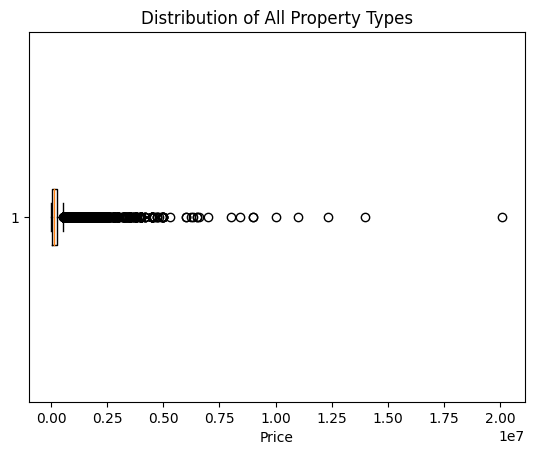

In [291]:
plt.boxplot(df["price_aprox_usd"], vert=False)
plt.xlabel("Price")
plt.title("Distribution of All Property Types");

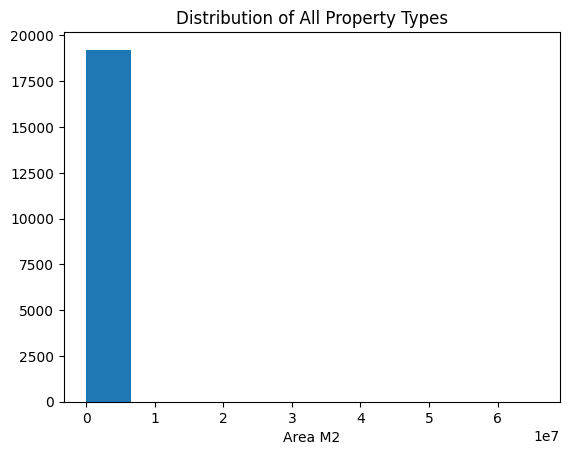

In [292]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area M2")
plt.title("Distribution of All Property Types");

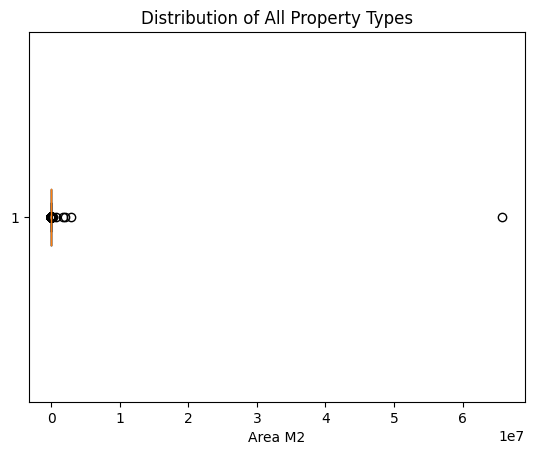

In [293]:
plt.boxplot(df["surface_covered_in_m2"], vert=False)
plt.xlabel("Area M2")
plt.title("Distribution of All Property Types");

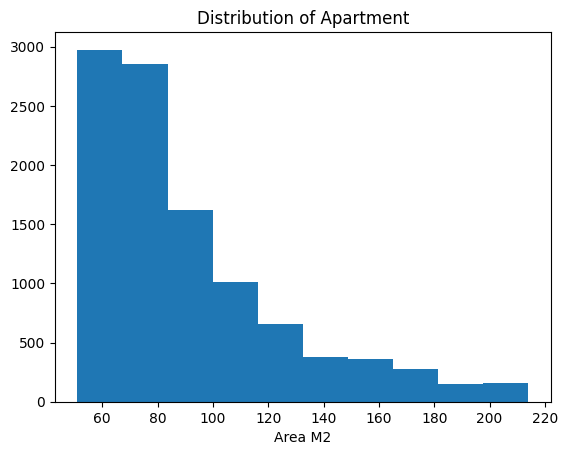

In [294]:
df_apt = df[df["property_type"]=="apartment"]
low, high = df_apt["surface_covered_in_m2"].quantile([0.1, 0.9])
mask_area = df_apt["surface_covered_in_m2"].between(low, high)
df_apt = df_apt[mask_area]
plt.hist(df_apt["surface_covered_in_m2"])
plt.xlabel("Area M2")
plt.title("Distribution of Apartment");

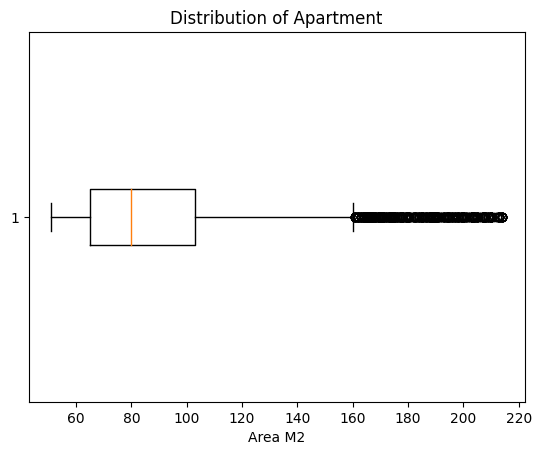

In [295]:
plt.boxplot(df_apt["surface_covered_in_m2"], vert=False)
plt.xlabel("Area M2")
plt.title("Distribution of Apartment");

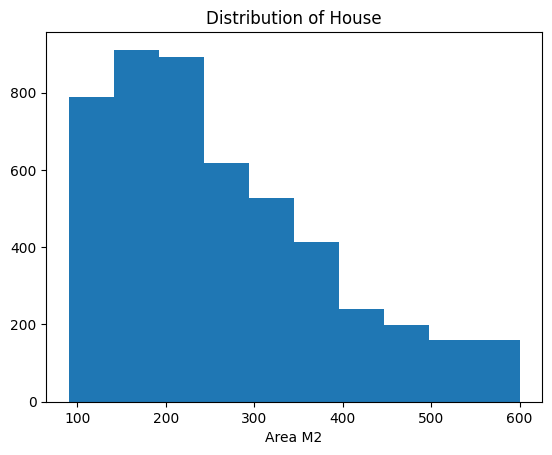

In [296]:
df_house = df[df["property_type"]=="house"]
low, high = df_house["surface_covered_in_m2"].quantile([0.1, 0.9])
mask_area = df_house["surface_covered_in_m2"].between(low, high)
df_house = df_house[mask_area]
plt.hist(df_house["surface_covered_in_m2"])
plt.xlabel("Area M2")
plt.title("Distribution of House");

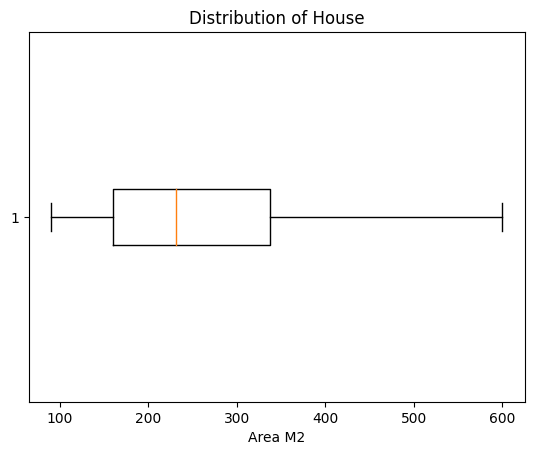

In [297]:
plt.boxplot(df_house["surface_covered_in_m2"], vert=False)
plt.xlabel("Area M2")
plt.title("Distribution of House");

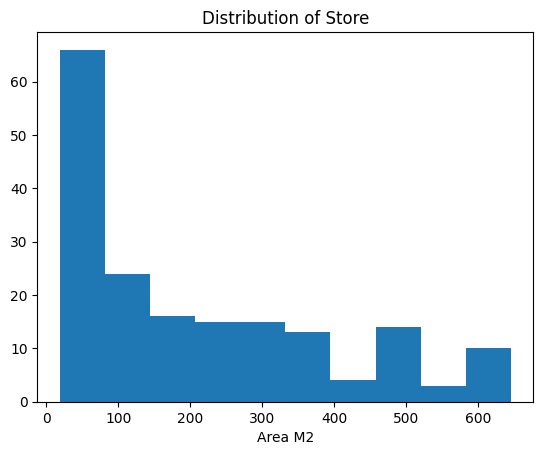

In [298]:
df_store = df[df["property_type"]=="store"]
low, high = df_store["surface_covered_in_m2"].quantile([0.1, 0.9])
mask_area = df_store["surface_covered_in_m2"].between(low, high)
df_store = df_store[mask_area]
plt.hist(df_store["surface_covered_in_m2"])
plt.xlabel("Area M2")
plt.title("Distribution of Store");

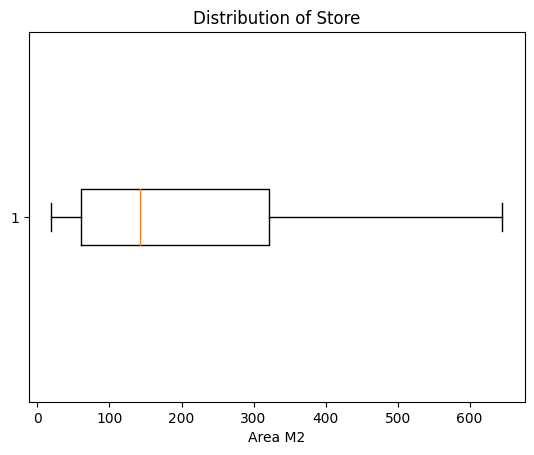

In [299]:
plt.boxplot(df_store["surface_covered_in_m2"], vert=False)
plt.xlabel("Area M2")
plt.title("Distribution of Store");

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 0 to 4626
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          19221 non-null  object 
 1   price_aprox_usd        19221 non-null  float64
 2   surface_covered_in_m2  19221 non-null  float64
 3   lat                    19221 non-null  float64
 4   lon                    19221 non-null  float64
 5   state                  19221 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.0+ MB


In [301]:
df = pd.concat([df_apt, df_house, df_store])

In [302]:
df.to_csv("data/mexico-city-real-estate.csv", index=False)